In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [100]:
from numbers import Integral
import numpy as np

class System(object):
    def __init__(self, dim):
        assert isinstance(dim, Integral) and dim >= 0
        self.dim = dim
        
class PointChargeSystem(System):
    def __init__(self, dim, coords, charges):
        super().__init__(dim)
        _coords, _charges = (self._try2arr(arg) for arg in (coords, charges))
#         try: _coords, _charges = np.array(coords), np.array(charges)
#         except: raise TypeError("Could not convert arguments to numpy.ndarray")
#         for _arg in (coords, charges): assert hasattr(_arg, "__len__")
        assert _coords.ndim == 2 and _charges.ndim == 1
        if _coords.shape[0] == _charges.size: self.N = _charges.size
        else: raise Exception("mismatch of numbers of chrages and coordinates")
        self.coords, self.charges = _coords, _charges
        
    @staticmethod
    def _try2arr(arr):
        if isinstance(arr, np.ndarray): return arr
        try: _ndarr = np.array(arr)
        except: raise TypeError("Could not convert arguments to {}".format(np.ndarray))
        return _ndarr
        
    def V(self, coords, thres=1e-10):
        """Evaluates electric potential in atomic units
        
        # Arguments
        - `coords` ndarray of shape (dim,...)
          : coordinates of evaluation
        """
        _coords = self._try2arr(coords)
        assert _coords.shape[0] == self.dim
        _coords = np.moveaxis(_coords, 0, -1)
        _V = np.zeros(_coords.shape[:-1], dtype=float)
        for _ri, _qi in zip(self.coords, self.charges):
            _dist = np.sqrt(np.square(_coords - _ri).sum(axis=-1))
            _dist[_dist<thres] = thres
            _V += _qi / _dist
        return _V

# implement diverge-limit

In [198]:
charge_coords = ([-1,1,0],[1,0,0],[-1,-1,0])
charges = (-1, 2, -1)
sys = PointChargeSystem(3, charge_coords, charges)

In [199]:
sys.V(((4,5),(1,3),(0,0)))

array([0.24676019, 0.10321107])

# Plot $V\left(\mathbf{r}\right)$

### Prepare evalulation coordnates

In [200]:
mesh_x_val = np.linspace(-3,3,51)
mesh_y_val = np.linspace(-3,3,31)
X, Y = np.meshgrid(mesh_x_val, mesh_y_val)
Z = np.zeros_like(X)

In [201]:
V_arr = sys.V((X, Y, Z))

In [202]:
vmax = np.abs(np.quantile(V_arr, (0.005,0.995))).max()
vmin = -vmax
from matplotlib.colors import Normalize
norm = Normalize(vmin, vmax)

xlim = mesh_x_val[[0, -1]]
ylim = mesh_y_val[[0, -1]]
extent = (*xlim, *ylim)

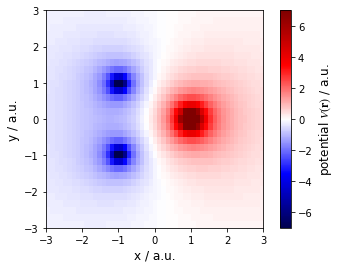

In [203]:
fig, ax = plt.subplots()

img = ax.imshow(V_arr, norm=norm, cmap='seismic', extent=extent, origin='lower')
ax.set_xlabel("x / a.u."), ax.set_ylabel("y / a.u.")
cb = fig.colorbar(img, ax=ax)
cb.set_label(r"potential $V\left(\mathbf{r}\right)$ / a.u.")

In [204]:
# fig.savefig("potential-test-2.png")

# etc.

In [11]:
aa = np.arange(24).reshape(3,8)

aa

In [17]:
r0 = np.array((-1,-1,-1))

In [19]:
aa.transpose() - r0

array([[ 1,  9, 17],
       [ 2, 10, 18],
       [ 3, 11, 19],
       [ 4, 12, 20],
       [ 5, 13, 21],
       [ 6, 14, 22],
       [ 7, 15, 23],
       [ 8, 16, 24]])